<a href="https://colab.research.google.com/github/4graf/Data_Processing/blob/main/ML/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame({'Кол-во товаров': [13, 4, 11, 20], 'Время в магазине': [8, 5, 6, 15]}, index=np.arange(1, 5))
x = df['Кол-во товаров']
y = df['Время в магазине']

x_mean = x.mean()
y_mean = y.mean()
print(f'{x_mean=}, {y_mean=}')

theta1 = sum((x-x_mean)*(y-y_mean))/sum((x-x_mean)**2)
theta0 = y_mean - theta1*x_mean
print(f'{theta1=}, {theta0=}')

x_mean=12.0, y_mean=8.5
theta1=0.6307692307692307, theta0=0.930769230769231


In [ ]:
n = len(x)
se_theta0 = (sum((y-theta0-theta1*x)**2)/(n-2))**0.5 * ((1/n)+(x_mean**2/sum((x-x_mean)**2)))**0.5
se_theta1 = (sum((y-theta0-theta1*x)**2)/(n-2))**0.5 * (1/sum((x-x_mean)**2))**0.5

conf_inter_theta0 = (theta0-4.303*se_theta0, theta0+4.303*se_theta0)
conf_inter_theta1 = (theta1-4.303*se_theta1, theta1+4.303*se_theta1)

print(f'{se_theta1=}, {se_theta0=}')
print(f'{conf_inter_theta1=}, {conf_inter_theta0=}')


se_theta1=0.18889275627397964, se_theta0=2.5095026499878137
conf_inter_theta1=(-0.1820362994777036, 1.443574761016165), conf_inter_theta0=(-9.86762067212833, 11.729159133666792)


In [ ]:
import scipy.stats as sps
import scipy.optimize as spo

def linear(x, a, b):
    return a * x + b

n = len(x)
((a,b), cov) = spo.curve_fit(linear, xdata=x, ydata=y)
a_err, b_err = np.sqrt(np.diag(cov))
a_conf = sps.t.interval(0.975, df = n-2, loc=a, scale=a_err)
b_conf = sps.t.interval(0.975, df = n-2, loc=b, scale=b_err)
print(a_err, b_err)
print(a_conf, b_conf)


0.18889277231823284 2.509502747439228
(-0.5413759339042284, 1.8029143954410825) (-14.64156567142614, 16.503104132964335)


In [ ]:
import scipy.stats as sps

n = len(x)
lin_model = sps.linregress(x, y)
a,b = lin_model.slope, lin_model.intercept
# оценка ср.кв. ошибки для a и b
a_err, b_err = lin_model.stderr, lin_model.intercept_stderr
# Доверительный интервал для alpha=2.5%
a_conf = sps.t.interval(0.975, df = n-2, loc=a, scale=a_err)
b_conf = sps.t.interval(0.975, df = n-2, loc=b, scale=b_err)

print(a_err, b_err)


print(f"a = {a:0.4f}, α=5% [{a_conf[0]:0.4f} - {a_conf[1]:0.4f}]")
print(f"b = {b:0.4f}, α=5% [{b_conf[0]:0.4f} - {b_conf[1]:0.4f}]")

0.18889275627397964 2.5095026499878137
a = 0.6308, α=5% [-0.5414 - 1.8029]
b = 0.9308, α=5% [-14.6416 - 16.5031]


In [ ]:
t = np.abs(theta1)/se_theta1
t

3.3392981457390087

In [ ]:
rse = ((1/(n-2))*sum((y-theta0-theta1*x)**2))**0.5
r2 = 1 - (sum((y-theta0-theta1*x)**2)/sum((y-y_mean)**2))

print(rse) 
print(r2)

2.153708786828326
0.8479192938209331


In [ ]:
x = np.array([3, -4])
x = np.insert(x, 0, 1)

theta = np.array([13.32, 5.08, -3.78])

y = sum(x*theta)
y

43.68

# SKLEARN

In [ ]:
! touch task1.txt
# input data to task1.txt
! mv task1.txt task1.csv

X.mean()=12.0
y.mean()=27.6
reg.intercept_=array([-0.19787234])
reg.coef_=array([[2.31648936]])      
reg.score(X, y)=0.8606305383221947


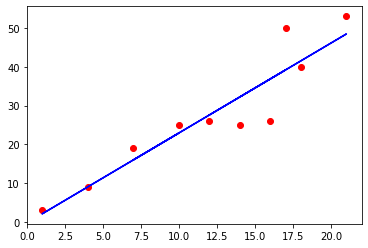

In [ ]:
from sklearn.linear_model import LinearRegression

df = pd.read_csv('task1.csv', index_col='id')
X = df['X'].to_numpy().reshape(-1, 1)
y = df['Y'].to_numpy().reshape(-1, 1)

reg = LinearRegression().fit(X, y)
Y = reg.predict(X)

plt.scatter(X, y, color='red')
plt.plot(X, Y, color='blue')

print(f'{X.mean()=}\n{y.mean()=}\n{reg.intercept_=}\n{reg.coef_=}\
      \n{reg.score(X, y)=}')

In [ ]:
! head -3 candy-data.csv

﻿competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
100 Grand,1,0,1,0,0,1,0,1,0,0.73199999,0.86000001,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.60399997,0.51099998,67.602936,1


In [ ]:
df = pd.read_csv('candy-data.csv')
X = df[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 
        'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 
        'pricepercent']]
X_train = X.loc[~df['competitorname'].isin(['Dum Dums', 'Nestle Smarties'])]
X_test = X.loc[df['competitorname'].isin(['Dum Dums', 'Nestle Smarties'])]

y = df['winpercent']
y_train = y.loc[~df['competitorname'].isin(['Dum Dums', 'Nestle Smarties'])].\
          to_numpy().reshape(-1, 1)
# y_test = y.loc[df['competitorname'].isin(['Dum Dums', 'Nestle Smarties'])].\
#          to_numpy().reshape(-1, 1)

reg = LinearRegression().fit(X_train, y_train)
print(f'''{reg.predict(X_test)=}
     {reg.predict(np.array([[1,1,1,1,0,1,0,0,0,0.128,0.37]]))=}''')
# df.loc[df['competitorname'] == 'Dum Dums']

reg.predict(X_test)=array([[47.69312171],
       [55.29253178]])
     reg.predict(np.array([[1,1,1,1,0,1,0,0,0,0.128,0.37]]))=array([[87.62803508]])


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
